# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. 

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

# Summary of Findings

### Introduction
Have you ever wondered if there was a reason why massive power outages in your community happen? Is it related to the weather? Too many people using the electricity? Maybe your region has poor electricity maintenance! In this project my partner and I attempt to tackle these questions. We utilize the dataset on these power outage events that dates back from January 2000 to July 2016. 

The dataset presents a multitude of variables and other valuable information that can help in future research on power outages, and possiblities on how they can be prevented. The dataset has 1540 rows, pertaining to a power outage and 57 columns of variables pertaining to that specific power outage. If you didn't know the prevalence of this issue, this number should astonish you, as this dataset includes hundreds of outages that involve a power outage that impacted over 50,000 customers and deprived a demand of 300 megawatts of electricity. The amount of people who are affected by these outages are even higher. 
We narrowed down the relevant columns to the following:
    
    YEAR : The year of the specific power outage
    
    MONTH : The month of the specific power outage
    
    U.S._STATE : The state where the power outage took place in
    
    POSTAL.CODE : Represents the postal code of the U.S. states
    
    NERC.REGION : The North American Electric Reliability Corporation (NERC) regions involved in the outage event
    
    CLIMATE.REGION : U.S. Climate regions as specified by National Centers for Environmental Information (nine climatically consistent regions in continental U.S.A.)
    
    ANOMALY.LEVEL : This represents the oceanic El Niño/La Niña (ONI) index referring to the cold and warm episodes by season. It is estimated as a 3-month running mean of ERSST.v4 SST anomalies in the Niño 3.4 region (5°N to 5°S, 120–170°W)
    
    CLIMATE.CATEGORY : This represents the climate episodes corresponding to the years. The categories—“Warm”, “Cold” or “Normal” episodes of the climate are based on a threshold of ± 0.5 °C for the Oceanic Niño Index (ONI)
    
    OUTAGE.START.DATE : This variable indicates the day of the year when the outage event started (as reported by the corresponding Utility in the region)
    
    OUTAGE.START.TIME : This variable indicates the time of the day when the outage event started (as reported by the corresponding Utility in the region)
    
    OUTAGE.RESTORATION.DATE : This variable indicates the day of the year when power was restored to all the customers (as reported by the corresponding Utility in the region)
    
    OUTAGE.RESTORATION.TIME : This variable indicates the time of the day when power was restored to all the customers (as reported by the corresponding Utility in the region)
    
    CAUSE.CATEGORY : Categories of all the events causing the major power outages
    
    CAUSE.CATEGORY.DETAIL : Detailed description of the event categories causing the major power outage
    
    HURRICANE.NAMES : If the outage is due to a hurricane, then the hurricane name is given by this variable
    
    OUTAGE.DURATION : Duration of outage events (in minutes)
    
    DEMAND.LOSS.MW  : Amount of peak demand lost during an outage event (in Megawatt) [but in many cases, total demand is reported]
    
    CUSTOMERS.AFFECTED : Number of customers affected by the power outage event
    
    
The main questions that we hope to answer through an analyses of this dataset are:

    What are the characteristics of major power outages of higher severity? 
    Does the climate category affect whether an outage is classified as major?
    
### Cleaning and EDA

To explain our data cleaning and EDA process, we will break it down into steps:

   1. We first loaded the excel file and narrowed down the columns to only the relevant ones to our analyses and questions.
   2. After taking a look at the data types for the columns, we wanted to add certain columns and clean some of the existing ones up. We accomplish this with our data_cleaning function.
   3. Once we finished the data cleaning process we moved onto the univariate, bivariate, and aggregate analyses.
   4. Univariate Analysis:
         We first wrote a function to compute the following univariate statistics in table form:
            Min year
            Max year
            Unique states
            Unique states
            Unique climate regions
            Unique climate categories
            Most common outage start date/time
            Most common outage restoration date/time
            Max outage duration
            Min outage duration
            Average outage duration
            Min customers affected
            Max customers affected
            Average customers affected
            
    There weren't that many meaningful insights that we could get from this table, but we noticed that there were cases where 0 customers were affected, which is odd given that these major outages mean a minimum of 50000 customers were affected. How could only 0 customers be affected? We addres this issue later on in our missingness section.
    We were interested in determining the proportion of these major outages grouped by climate category, climate region, and season. 
    We noticed that there was a higher proportion of normal outages, with nearly half of them being normal. However, we want to note that these numbers could just be because more of the US consists of normal climates.
    When grouped by Climate Region we noticed that the Northeast region had a large proportion of outages, followed by the South, West, and Central regions. We surmise that the population and urban density in these areas possibly had an effect on this.
    Finally, we noticed that in the summer and winter there is a higher proportion of outages. This is interesting to us because our hypothesis ties into if climate has an effect on the severity of an outage. From this number it is possible that the more extreme weather conditions in the summer and winter affect the outage severity.
   5. Bivariate Analysis
   
    To help us answer the question of how a climate can affect the severity we make scatter plots of the Season vs (Outage Duration and Demand Loss). 
    In Season vs Outage Duration, the spread of these numbers across the seasons were relatively similar and hard to determine any major differences, albeit there were a few outliers.
    In Season vs Demand we could see that there was larger spread of Demand Loss in the summer.
    Finally, we plotted the metrics of severity with each other and calculated the correlation coefficient to determine if there was a relationship between the severities.
    We notice here that there is somewhat of a positive association between the demand loss and the customers affected, and between outage duration and customers affected. However, these correlation coefficients are all relatively small, so when determining severity of an outage it might be a better alternative to develop a model that places weights using all three of these metrics, as there isn’t really one metric between the three that is best. 
   6. Aggregate Analysis
   
     In the aggregate analysis we wanted to determine if there were large differences between the averages of the three main measures of severity when aggregated across State, Climate, Year, and Cause Category. 
     We made groupbys for each of the following aggregations and solved for the mean, min and max of each of the aggregations. 
     We then generated bar plots to help us visualize these differences. 
     There weren’t many meaningful insights to be drawn from the state, cause category, and year aggregations, since there wasn’t a clear trend for us to see. However, we noticed that warm climates tend to be very high in the severity metrics. It was the highest for average duration of outage, second highest for average customers affected, and highest for demand loss.
     From here, we wanted to see if the climate category would have a meaningful effect on the severity of a power outage.


### Assessment of Missingness
For our data set we decided to assess the missingness of the “CUSTOMERS.AFFECTED” column. We did not believe that this column was ‘Not Missing at Random’, thinking that the column could potentially be MAR dependent on “OUTAGE.DURATION” and “DEMAND.LOSS.MW” and not MAR dependent on “ANOMALY.LEVEL”. Our thought process behind the missing of the customers affected being MAR dependent on demand loss and outage duration resulted from observation. We noticed that the customers affected column often was missing for power outages with a low duration and low demand loss. We thought that this might potentially mean that the customers affected were not reported for power outages that did last long and did not affect demand by much. We also figured that anomaly level and the customers affected were most likely not related in any way in regards to missingness.

In our order to test our theories we ran three permutation tests using the ks statistic. In our first test we tested if the missingness of customers affected was MAR dependent on outage duration. After running 500 repetitions of the test we calculated a pval of 0. In our second test we tested if the missingness of customers affected was MAR dependent on demand loss and similarly got a pval of 0. These results give us reason to believe that the distributions in the two tests were not the same, supporting our theory that the missingness of customers affected was in fact MAR dependent on outage duration and demand loss. In our last we tested if the missingness of customers affected was MAR dependent on anomaly level. After running 500 repetitions of the test we calculated a pval of 0.432. This result differed from our previous two - we failed to reject the null hypothesis that the distributions were the same, leading us to conclude that the missingness of customers affected is most likely not affected by anomaly level.


### Hypothesis Test
For our hypothesis test we wanted to look deeper into the relationship between climate category and the severity of power outages. One might believe that the type of climate has an affect on how ‘severe’ a power outage is. For instance, snow storms (‘cold’ climate) might foster longer power outages or tropical storms (‘warm’ climate) might also lead to long power outages. In order to define severity we tried to look at whether a particular power outage was defined as ‘Major’ or not. Here, a major power outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of at least 300MW. We performed a permutation test to see if in our cleaned data set, the distribution of climate category among those power outages that were classified as 'major' is the same as among those that were not classified as 'major'. Our null and alternative hypotheses were defined as the following:

Null: In the US power outages data set, the distribution of climate category among those power outages that were classified as 'major' is the same as among those that were not classified as 'major'. The difference between the two samples is due to chance.

Alternative: In the US power outages data set, the distribution of climate category among the two groups of power outages is different.

To do this we first looked at our observed distribution of power outages in each climate category conditional on whether the power outage was defined as ‘major’ or not major. We noticed there was a slight difference in the number of major vs non major power outages in each climate. We ran our simulation to see if this difference was just due to noise. For our test statistic we used the TVD and set a significance level of 5%.

After running our simulation 1000 times we computed a pval of 0.206. We failed to reject our null hypothesis at the 5% significance level. We could not  conclude that there was a significant difference in the classification of 'major' power outages vs. non 'major' power outages in different climate categories. The results of this test tell us that climate might not be the best factor to consider when determining where the next major power outages will occur for a power company. 

## ML Model:

### Introduction
For our project we are trying to predict whether or not a power outage is measured as a "major power outage". A major outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Our data did not come with a variable indicating whether or not a power outage observation was defined as major. After pulling in our data and cleaning it we added a column to the dataframe that indicates to us whether or not a given power outage was defined as major. To do this, we classified those observations that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300 MW as a 1 in the "major_outage" column and a 0 for those observations that did not meet either of the specified requirements. The problem we are attempting to solve is a classification problem where we are trying to predict whether any given observation has either a 0 or a 1 in the "major_outage" column based on other variables in our dataset. Our objective is to improve the accuracy between our baseline model and our final model.

In our outages dataset 785/1534 of our power outages were classified as major, or about 51%. After considering the real world implications of our model, we decided to chose accuracy as our objective because our data was pretty evenly split between major power outages and non major power outages. Since we ended up using the "outage duration" column in our model, our model would not likely be one used to predict a major power outage before the outage has ended, consequently telling us that in this case a false positive is just as bad as a false negative.

### Baseline Model
For our baseline model we decided to use a Decision Tree Classifier with a max depth of 8 as our only parameter. We picked this model as it was the classification algorithm that we understood the most. We picked the number 8 as our baseline depth parameter based on the number of features we used and also just intuition. For this original model we decided to use US state, Year, Climate Region, Anomaly Level, Climate Category, and Outage Duration as our features to try and predict the classification of a power outage. Year, Anomaly Level, and Outage Duration were orignally quantitative so they did not need to be engineered. US State, Climate Region, and Climate Category, however, were categorical variables and we decided to one hot encode them. This is a total of six overall features, three of which were originally quantitative and three of which were categorical. Out of these features Outage Duration and Anomaly Level were quantitative, Year was ordinal, and US State, Climate Region, and Climate Category were nominal.

After testing our baseline model we got a baseline accuracy of about 0.85 when training on our entire dataset. Overall, our accuracy from the baseline model was alright but we thought it could be improved by adding and engineering a few features and modifying the decision tree parameters. An accuracy of 0.85 is pretty high but we also wanted to test our model to make sure we were not overfitting and that our model could generalize to potentially unseen data. 


### Final Model
To improve the accuracy of our model we went through the following procedure:

First, we addded in and engineered the month column in an sklearn pipeline to categorize the months by season. We then onehotencoded the season column. We made this modification under the logic that some seasons of the year that have harsher weather might be more prone to having major power outages.

Second, we added in the Cause Category feature and binarized this column to give a 1 when the cause category was "severe weather" and a 0 otherwise. We made this modification after we noticed that out of the 763 power outages in our dataset that had severe weather as their cause, 662 of them were major power outages. And out of the 771 power outages that did not have severe weather as their cause only 123 were major power outages. This told us that the cause of a power outage being severe weather is likely a strong predictor of whether the power outage was major or not.

After engineering these features our accuracy improved to 0.92 when training on our entire dataset.

Third, we investigated how our model worked with a train test split along with the engineered features and some modified parameters. For our modified Decision Tree Classifier parameters we arbitrarily picked a max depth of 4, a min samples leaf of 2, and min samples split of 2. After running this a few times with train test split we found that we were getting a test accuracy of around 0.83.

Fourth, we performed a search for the best parameters of the Decision Tree Classifier. To do this we used the Grid Search Cross Validation with a cv of 8. After running this we found that a max depth of 3, min samples leaf of 7, and min samples split of 20 gave us a consistent accuracy on our test data of 0.86. These parameters reduced the accuracy when using training on our entire dataset, but they gave us the best accuracy when we generalized using train test split.

Lastly, we tried to search for a better classification algorithm. We tried to build a model with the KNeighbors Classifier and found the best parameters to see if this model could help improve the accuracy of our predictions. We thought that this model might make better predictions since some observations might be very similar to each other in our dataset. Overall, this model did not improve our accuracy, coming in around 0.73 when generalized, even after searching for the best parameters. 

Ultimately we decided on the Decision Tree Classifier with max depth 3, min samples leaf 7, and min samples split of 20. Our final features were: US State (one hot encoded), Year (as is), Climate Region (one hot encoded), Anomaly Level (as is), Climate Category (one hot encoded), Outage Duration (as is), Month (transformed to season + one hot encoded), Cause Category (binarized). This model and feature combination consistently gave us the best accuracy overall.

### Fairness Evaluation

For our fairness evaluation we wanted to test whether our final model worked better for long power outages or short power outages. Here we defined a long power outage as one that had an outage duration over the mean outage duration among all of the power outages and a short power outage as one that had an outage duration less than the mean outage duration among all of the power outages. We set a 0.05 significance level and our null + alternative hypotheses to be:

{use of accuracy justified in introduction}

Null Hypothesis: my model is fair, the accuracy for our two subsets are roughly the same

Alternative Hypothesis: my model is unfair; the accuracy for the long outage subset is higher than the short outage subset

Before running our test we looked at the observed accuracy difference between models we saw that the accuracy of the long outage dataset was 0.89 and the observed accuracy of the short outage dataset was 0.83. When we ran our permutation test we got a pval of 0.12. This tells us that it is pretty likely under random chance that we would see a difference this large. We fail to reject the null hypothesis that the accuracy of our two subsets are roughly the same, but we cannot be certain that the model is completely fair.

# Code

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ks_2samp

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [4]:
#We first read in the file from excel and keep the columns relevant to our question.
def read_data(fp):
    """
    This is a function that reads in the Excel file with outages data.
    Only the appropriate rows/columns are taken in.
    fp = os.path.join('data', 'outage.xlsx')
    """
    
    #reads the excel file
    data = pd.read_excel(fp, header = 5, usecols = "B:T")
    
    # drop the first row with the descriptions
    data = data.drop([0])
    
    return data


In [5]:
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp).head()

In [6]:
#checking the dtata types of the relevant columns 
data.dtypes

OBS                        float64
YEAR                       float64
MONTH                      float64
U.S._STATE                  object
POSTAL.CODE                 object
NERC.REGION                 object
CLIMATE.REGION              object
ANOMALY.LEVEL               object
CLIMATE.CATEGORY            object
OUTAGE.START.DATE           object
OUTAGE.START.TIME           object
OUTAGE.RESTORATION.DATE     object
OUTAGE.RESTORATION.TIME     object
CAUSE.CATEGORY              object
CAUSE.CATEGORY.DETAIL       object
HURRICANE.NAMES             object
OUTAGE.DURATION             object
DEMAND.LOSS.MW              object
CUSTOMERS.AFFECTED         float64
dtype: object

In [7]:
## helper function to convert into seasons
def season_helper(obs):
    """
    Helper functions converts month into 
    respective season.
    """
    if obs >= 3 and obs <= 5:
        return 'Spring'
    elif obs >= 6 and obs <= 8:
        return 'Summer'
    elif obs >= 9 and obs <= 11:
        return 'Fall'
    elif pd.isnull(obs):
        return np.NaN
    else:
        return 'Winter'
def data_cleaning(data):
    """
    Takes in a table like the one produced by read_data(fp) and
    does the necessary stuff to clean the data set. This includes:
    -> combining the outage time/date columns into one
    -> combining the restoration time/date columns into one
    -> type casting the values in columns to their proper types
    (year needs to be an int, month should be an int, customers affected should probably
    be an int because you can't have half a customer)
    """
    data_copy = data.copy(deep = True)
    
    # combine outage start time/date
    data_copy["OUTAGE.START.DATE"] = pd.to_datetime(data_copy["OUTAGE.START.DATE"])
    data_copy["OUTAGE.START.TIME"] = pd.to_timedelta(data_copy["OUTAGE.START.TIME"].astype(str))
    data_copy["OUTAGE.START"] = data_copy["OUTAGE.START.DATE"] +  data_copy["OUTAGE.START.TIME"]
    data_copy = data_copy.drop(columns = ["OUTAGE.START.DATE","OUTAGE.START.TIME"])
    
    # combine outage restoration time/date
    data_copy["OUTAGE.RESTORATION.DATE"] = pd.to_datetime(data_copy["OUTAGE.RESTORATION.DATE"])
    data_copy["OUTAGE.RESTORATION.TIME"] = pd.to_timedelta(data_copy["OUTAGE.RESTORATION.TIME"].astype(str))
    data_copy["OUTAGE.RESTORATION"] = data_copy["OUTAGE.RESTORATION.DATE"] +  data_copy["OUTAGE.RESTORATION.TIME"]
    data_copy = data_copy.drop(columns = ["OUTAGE.RESTORATION.DATE", "OUTAGE.RESTORATION.TIME"])
    
    # cast values to 'correct' types + set index
    data_copy = data_copy.set_index('OBS')
    data_copy["YEAR"] = data_copy["YEAR"].astype(int)
    data_copy["OUTAGE.DURATION"] = data_copy["OUTAGE.DURATION"].astype(float)
    data_copy['DEMAND.LOSS.MW'] = data_copy['DEMAND.LOSS.MW'].astype(float)
    #add on a season column based on the month
    data_copy['SEASON'] = data_copy['MONTH'].apply(season_helper)
    
    
    data_copy = data_copy.reset_index().drop(columns = ['OBS'])
    
    return data_copy

In [8]:
# now let us read in the clean data
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)
clean_data.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,OUTAGE.START,OUTAGE.RESTORATION,SEASON
0,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,NaN,3060.0,NaN,70000.0,2011-07-01 17:00:00,2011-07-03 20:00:00,Summer
1,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,NaN,1.0,NaN,NaN,2014-05-11 18:38:00,2014-05-11 18:39:00,Spring
2,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,NaN,3000.0,NaN,70000.0,2010-10-26 20:00:00,2010-10-28 22:00:00,Fall
3,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,NaN,2550.0,NaN,68200.0,2012-06-19 04:30:00,2012-06-20 23:00:00,Summer
4,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,NaN,1740.0,250.0,250000.0,2015-07-18 02:00:00,2015-07-19 07:00:00,Summer


### Univariate Analysis

In [9]:
# function to compute univariatet stats
def compute_univariate_stats(data):
    """
    Takes in the cleaned data and computes some
    univariate statistics and returns them in a dataframe.
    -> min year in data set
    -> max year in data set
    -> # unique states
    -> # unique climate regions
    -> # unique climate categories
    -> most common outage start date/time
    -> most common outage restoration date/time
    -> max outage duration
    -> min outage duration
    -> average outage duration
    -> min customers affected
    -> max customers affected
    -> average customers affected
    """
    data_copy = data.copy(deep = True)
    
    min_year = data_copy["YEAR"].min()
    max_year = data_copy["YEAR"].max()
    
    numunique_states = data_copy["U.S._STATE"].nunique()
    numunique_climregions = data_copy["CLIMATE.REGION"].nunique()
    numunique_climcats = data_copy["CLIMATE.CATEGORY"].nunique() # normal, cold, warm
    
    most_com_start = data_copy["OUTAGE.START"].describe()['top']
    most_com_restoration = data_copy["OUTAGE.RESTORATION"].describe()['top']
    
    max_outage_dur = data_copy["OUTAGE.DURATION"].max()/60
    min_outage_dur = data_copy["OUTAGE.DURATION"].min()/60
    avg_outage_dur = data_copy["OUTAGE.DURATION"].mean()/60
    
    max_cust_affected = int(data_copy["CUSTOMERS.AFFECTED"].max())
    min_cust_affected = int(data_copy["CUSTOMERS.AFFECTED"].min())
    avg_cust_affected = int(np.round(data_copy["CUSTOMERS.AFFECTED"].mean()))
    
    table_data = [min_year, max_year, numunique_states, numunique_climregions, numunique_climcats,
                 most_com_start, most_com_restoration, max_outage_dur, min_outage_dur, avg_outage_dur,
                 max_cust_affected, min_cust_affected, avg_cust_affected]
    
    table_index = ["Min Year", "Max Year", "# Unique States", "# Unique Climate Regions", "# Unique Climate Cats.",
                  "Most Common Start Date/Time", "Most Common Rest. Date/Time", "Max Outage Duration (hrs)",
                  "Min Outage Duration (hrs)", "Avg Outage Duration (hrs)", "Max # Customers Affected", 
                  "Min # Customers Affected", "Avg # Customers Affected"]
    
    table = pd.DataFrame(data = table_data, index = table_index, columns = ["Univariate Statistics"])
    
    return table

In [10]:
# Here we produced a table of relevant univariate statistics
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)
compute_univariate_stats(clean_data)

,Univariate Statistics
Min Year,2000
Max Year,2016
# Unique States,50
# Unique Climate Regions,9
# Unique Climate Cats.,3
Most Common Start Date/Time,2010-08-02 12:45:00
Most Common Rest. Date/Time,2010-08-04 11:00:00
Max Outage Duration (hrs),1810.88
Min Outage Duration (hrs),0
Avg Outage Duration (hrs),43.7566


In [11]:
#proportions of outages by climate category
clean_data['CLIMATE.CATEGORY'].value_counts(normalize = True)

normal    0.487869
cold      0.310164
warm      0.201967
Name: CLIMATE.CATEGORY, dtype: float64

In [12]:
#proportions of outages by climate region
clean_data['CLIMATE.REGION'].value_counts(normalize = True)

Northeast             0.229058
South                 0.149869
West                  0.142016
Central               0.130890
Southeast             0.100131
East North Central    0.090314
Northwest             0.086387
Southwest             0.060209
West North Central    0.011126
Name: CLIMATE.REGION, dtype: float64

In [13]:
#proportions of outages by season
clean_data['SEASON'].value_counts(normalize = True)

Summer    0.346885
Winter    0.251148
Spring    0.221639
Fall      0.180328
Name: SEASON, dtype: float64

### Bivariate Analysis

Text(0.5, 1.0, 'Season vs Outage Duration')

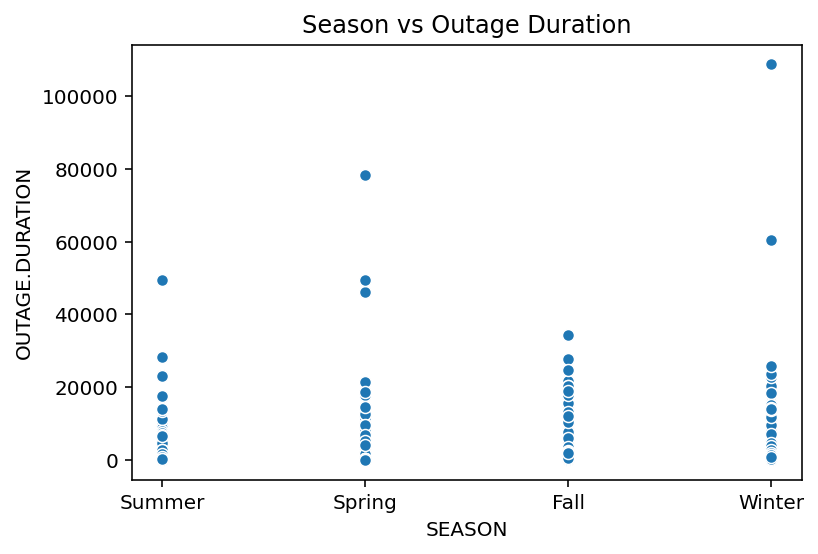

In [14]:
# season vs outage duration scatterplot
season_duration = sns.scatterplot(x = clean_data['SEASON'], y = clean_data['OUTAGE.DURATION'])
plt.title('Season vs Outage Duration')

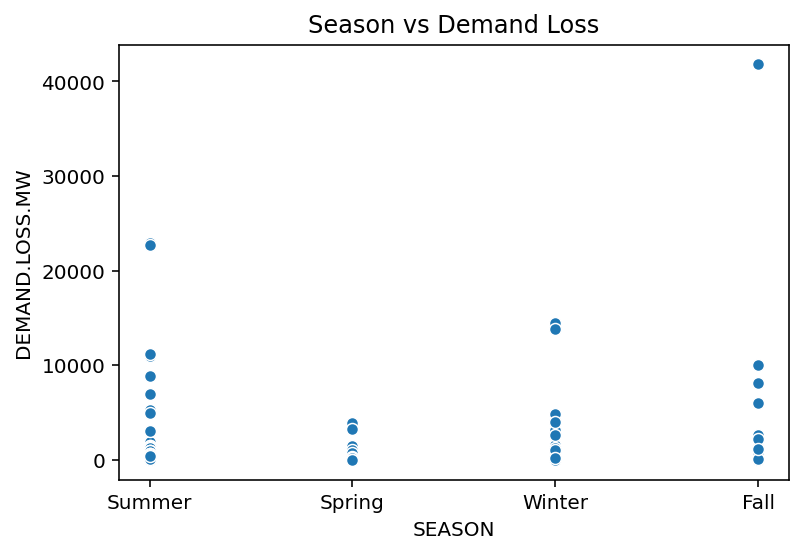

In [15]:
#season vs demand loss plot
season_demand = sns.scatterplot(x = clean_data['SEASON'], y = clean_data['DEMAND.LOSS.MW'])
plt.title('Season vs Demand Loss')
plt.show()

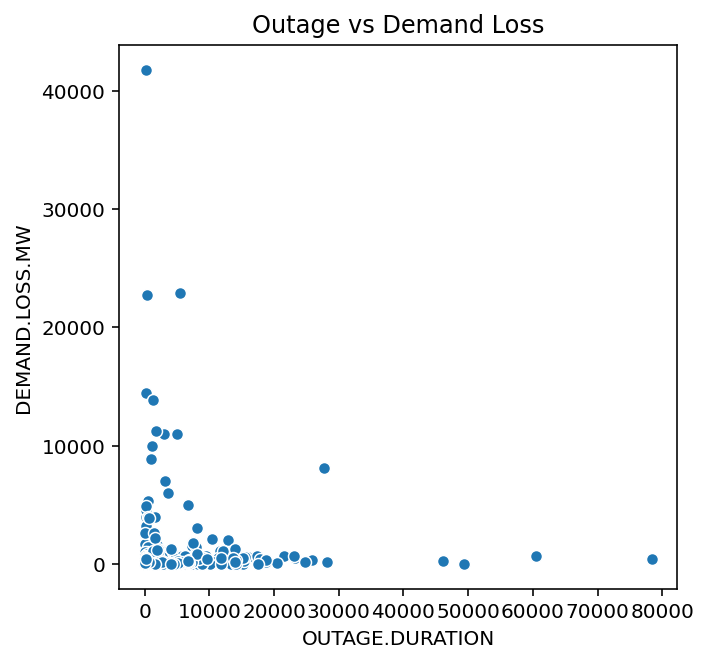

correlation coefficient: 0.018621287652015348


In [16]:
# demand loss vs duration to see relationship
plt.figure(figsize = (5,5))
dl_duration = sns.scatterplot(x = clean_data['OUTAGE.DURATION'], y = clean_data['DEMAND.LOSS.MW'])
plt.title('Outage vs Demand Loss')
plt.show()
corr = pearsonr(clean_data['OUTAGE.DURATION'].fillna(0), clean_data['DEMAND.LOSS.MW'].fillna(0))[0]
print('correlation coefficient: ' + str(corr))

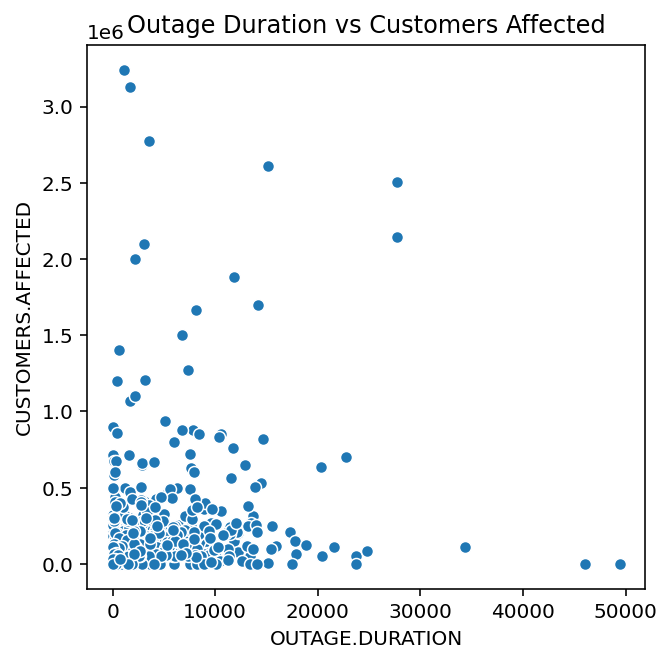

correlation coefficient: 0.1740290539994629


In [17]:
# customers affected vs customers affected scatterplot
plt.figure(figsize = (5,5))
dl_duration = sns.scatterplot(x = clean_data['OUTAGE.DURATION'], y = clean_data['CUSTOMERS.AFFECTED'])
plt.title('Outage Duration vs Customers Affected')
plt.show()
corr = pearsonr(clean_data['OUTAGE.DURATION'].fillna(0), clean_data['CUSTOMERS.AFFECTED'].fillna(0))[0]
print('correlation coefficient: ' + str(corr))

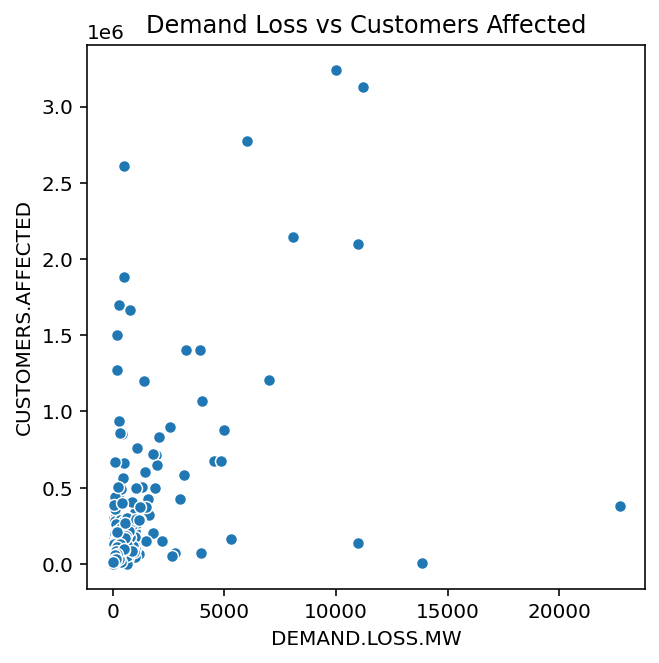

correlation coefficient: 0.26770031980190645


In [18]:
# demand loss vs customers affected scatterplot
plt.figure(figsize = (5,5))
dl_duration = sns.scatterplot(x = clean_data['DEMAND.LOSS.MW'], y = clean_data['CUSTOMERS.AFFECTED'])
plt.title('Demand Loss vs Customers Affected')
plt.show()
corr = pearsonr(clean_data['DEMAND.LOSS.MW'].fillna(0), clean_data['CUSTOMERS.AFFECTED'].fillna(0))[0]
print('correlation coefficient: ' + str(corr))

### Aggregate Analysis

#### State Level

In [19]:
# helper function to determine if a power outage is major or not
def detect_major(row):
    if row["CUSTOMERS.AFFECTED"] > 50000:
        return True
    elif row["DEMAND.LOSS.MW"] > 300:
        return True
    else:
        return False

In [20]:
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)

In [21]:
# map building process
clean_data["Major_Outage"] = clean_data.apply(detect_major, axis = 1)
grouped = clean_data.groupby("U.S._STATE").count()
grouped = grouped.drop(columns = ["YEAR", "MONTH", "POSTAL.CODE", "NERC.REGION", "CLIMATE.REGION",
                                 "ANOMALY.LEVEL", "CLIMATE.CATEGORY", "CAUSE.CATEGORY",
                                 "CAUSE.CATEGORY.DETAIL", "HURRICANE.NAMES", "OUTAGE.DURATION",
                                 "DEMAND.LOSS.MW", "CUSTOMERS.AFFECTED", "OUTAGE.START", "OUTAGE.RESTORATION",
                                 "SEASON"])
rhode_island = pd.DataFrame(data = {"Major_Outage": 0}, index = ["Rhode Island"])
state_data = pd.concat([grouped, rhode_island])
state_data = state_data.drop(index = 'Alaska')
state_data = state_data.drop(index = 'Hawaii')
state_data = state_data.sort_index()

In [22]:
# map building process
import json

states_geo = 'data/united-states.geojson'

with open(states_geo) as states_file:
    states_json = json.load(states_file)
    
    
denominations_json = []

for index in range(len(states_json['features'])):
    denominations_json.append(states_json['features'][index]['properties']['name'])
    
#denominations_json

FileNotFoundError: [Errno 2] No such file or directory: 'data/united-states.geojson'

In [37]:
# map bulding process
df_names = state_data.index.tolist()
geojson_names = denominations_json

state_data.replace(dict(zip(df_names, geojson_names)), inplace = True)

NameError: name 'denominations_json' is not defined

In [38]:
state_data = state_data.reset_index()

In [39]:
# plot the map ("Number of Major Power Outages by State")
import folium

states_geo = 'data/united-states.geojson'

states_map = folium.Map(location=[32.949683, -117.075116], zoom_start=4, tiles='stamenwatercolor')
states_map.choropleth(
    geo_data = states_geo,
    data = state_data, 
    columns = ["index","Major_Outage"],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 1, 
    line_opacity = 1,
    legend_name = "Major Power Outages by State",
    smooth_factor = 0)

# our beatiful map does not show in the PDF :(
states_map

ModuleNotFoundError: No module named 'folium'

#### Climate Level

In [40]:
def climate_level_eda(data):
    """
    Takes in a cleaned power outages data frame and groups by
    climate category to find the average duration of power outages in each region.
    Creates a bar chart by region.
    """
    data_copy = data.copy(deep = True)
    data_copy = data_copy.drop(columns = ["YEAR", "MONTH"])
    grouped_data = data_copy.groupby("CLIMATE.CATEGORY").agg(['mean', 'min', 'max'])

    return grouped_data

In [41]:
by_climates = climate_level_eda(clean_data)
by_climates

OUTAGE.DURATION                DEMAND.LOSS.MW                \
                            mean  min       max           mean  min      max   
CLIMATE.CATEGORY                                                               
cold                 2656.956803  0.0  108653.0     391.028000  0.0  14435.0   
normal               2530.980822  0.0   78377.0     574.796954  0.0  22934.0   
warm                 2817.318021  0.0   49427.0     657.854749  0.0  41788.0   

                 CUSTOMERS.AFFECTED                  
                               mean  min        max  
CLIMATE.CATEGORY                                     
cold                  126840.066869  0.0  2606931.0  
normal                153182.834286  0.0  3241437.0  
warm                  146843.895652  0.0  2775093.0

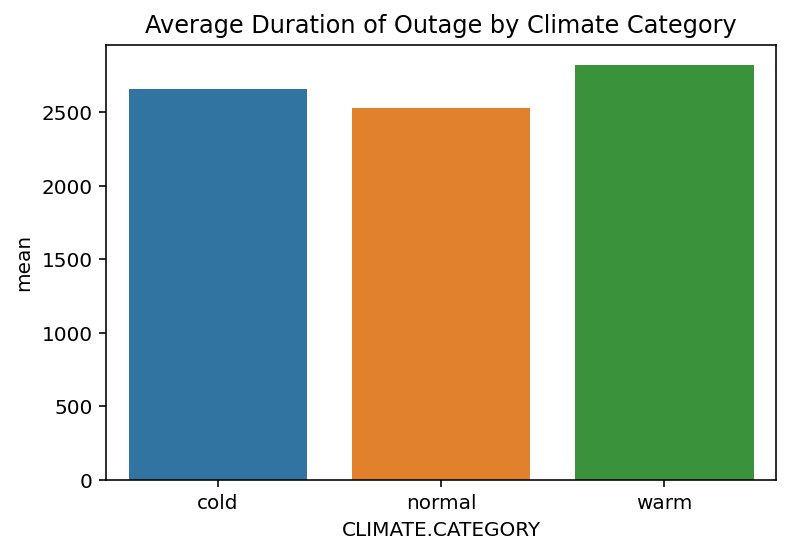

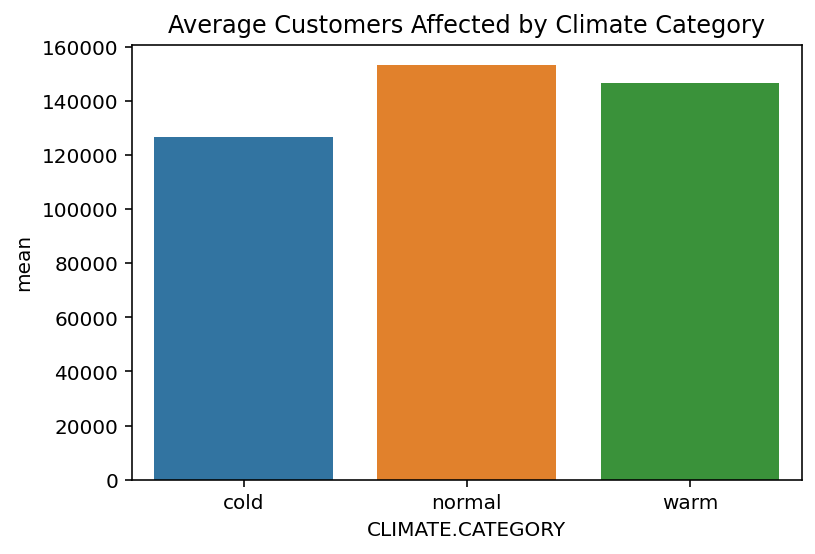

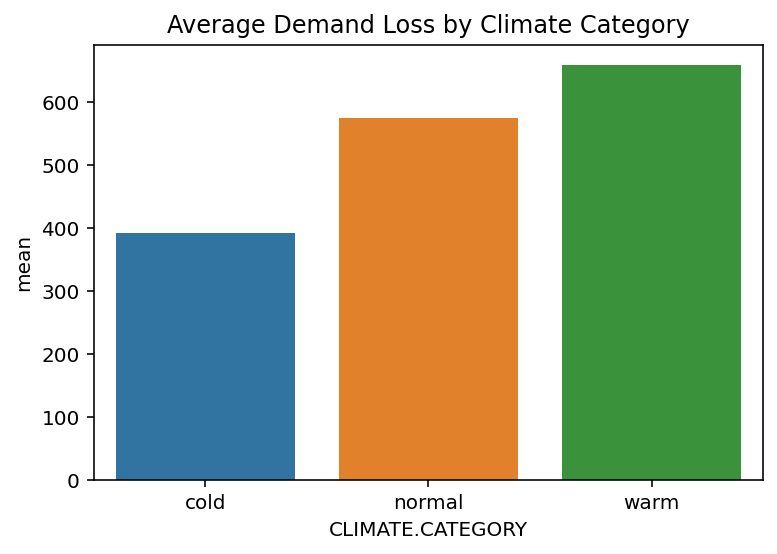

In [42]:
#We plot the climates by average outage duration and customers affected here in a bar chart

climates_duration = sns.barplot(x = by_climates.index,
                               y = by_climates['OUTAGE.DURATION']['mean'])
plt.title('Average Duration of Outage by Climate Category')
plt.show()
# add one for category by customers, category by demand loss
climates_customer = sns.barplot(x = by_climates.index,
                               y = by_climates['CUSTOMERS.AFFECTED']['mean'])
plt.title('Average Customers Affected by Climate Category')
plt.show()
#demand loss by climate category
climates_demand = sns.barplot(x = by_climates.index,
                               y = by_climates['DEMAND.LOSS.MW']['mean'])
plt.title('Average Demand Loss by Climate Category')
plt.show()

#### Year Level

In [43]:
def year_eda(data):
    """
    Plots the average duration of power outages per year by year.
    """
    data_copy = data.copy(deep = True)
    data_copy = data_copy.drop(columns = ["MONTH"])
    grouped_data = data_copy.groupby("YEAR").agg(['mean', 'min', 'max'])

    return grouped_data

In [44]:
# Let us aggregate by year and compute the mean min and max.
by_year = year_eda(clean_data)

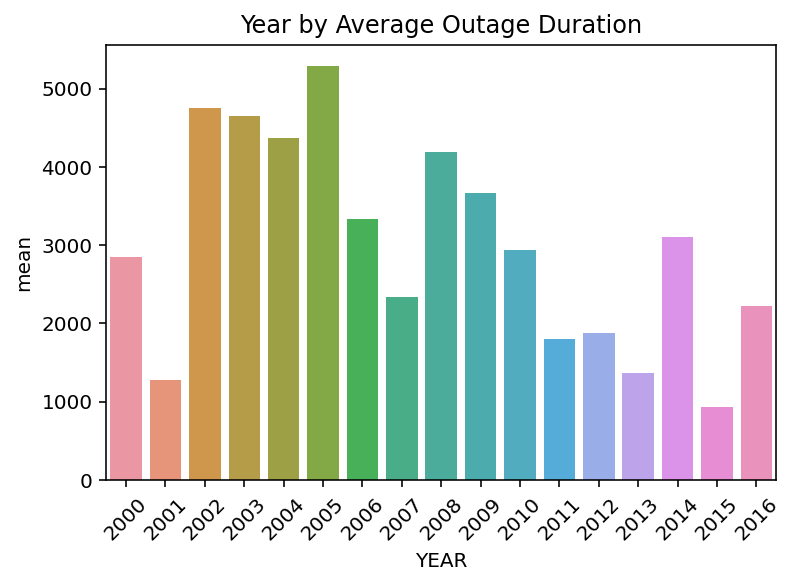

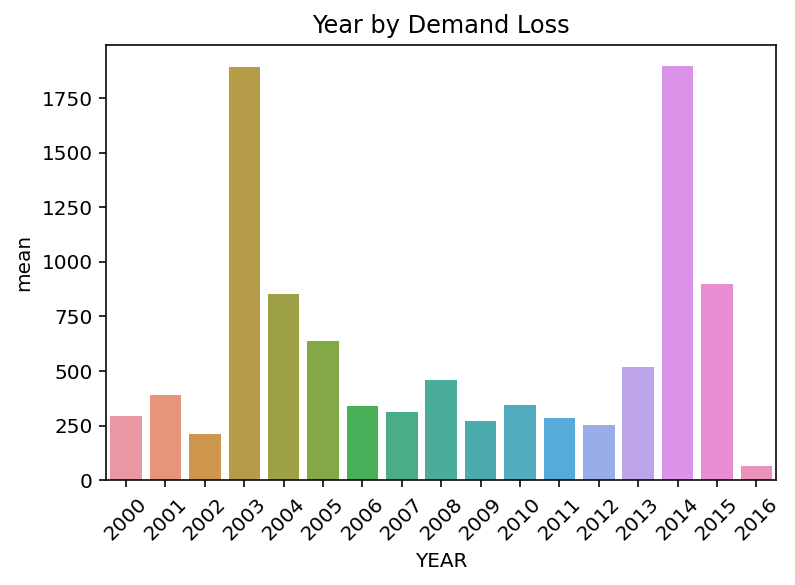

In [45]:
# Let us plot the average outage duration and demand loss by year 
category_duration = sns.barplot(x = by_year.index, 
                                y = by_year['OUTAGE.DURATION']['mean'])
plt.title('Year by Average Outage Duration')
plt.xticks(rotation = 45)
plt.show()

category_dl = sns.barplot(x = by_year.index, 
                                y = by_year['DEMAND.LOSS.MW']['mean'])
plt.title('Year by Demand Loss')
plt.xticks(rotation = 45)
plt.show()

#### Category Level

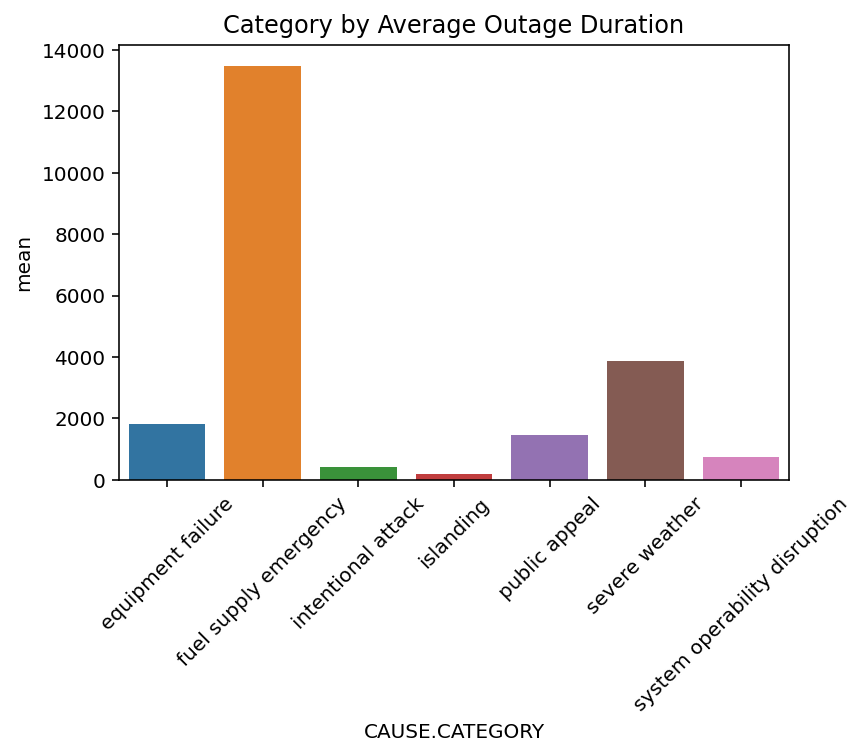

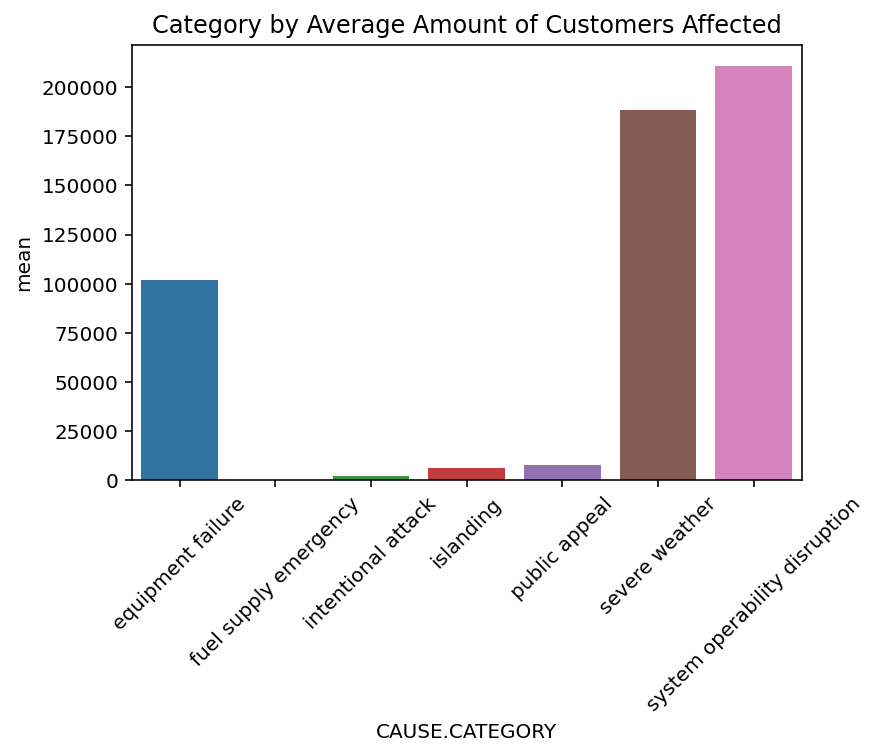

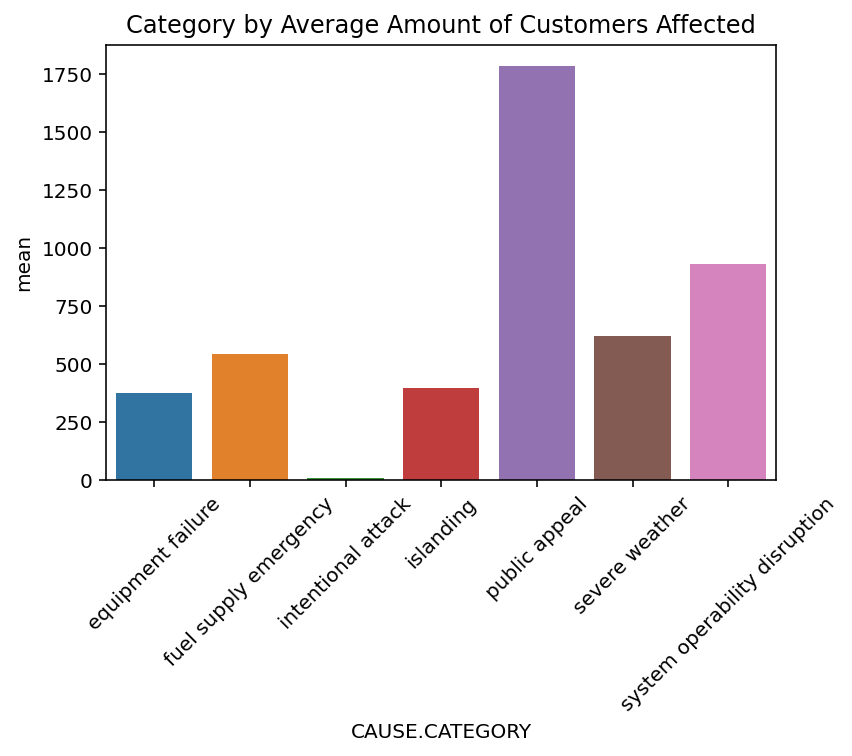

In [46]:
def category_eda(data):
    """
    This function computes the aggregated statistics 
    for each category of outage causation
    """
    data_copy = data.copy()
    data_copy = data_copy[['OUTAGE.DURATION', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'CAUSE.CATEGORY']]
    data_copy['DEMAND.LOSS.MW'] = data_copy['DEMAND.LOSS.MW'].astype(float)

    return data_copy.groupby('CAUSE.CATEGORY').agg(['min', 'max', 'mean'])
# make bar plots for outage by outage duration, demand loss, and customers affected

by_category = category_eda(clean_data)
category_duration = sns.barplot(x = by_category.index, 
                                y = by_category['OUTAGE.DURATION']['mean'])
plt.title('Category by Average Outage Duration')
plt.xticks(rotation = 45)
plt.show()
#Customers affected plot
category_customers = sns.barplot(x = by_category.index, 
                                y = by_category['CUSTOMERS.AFFECTED']['mean'])
plt.title('Category by Average Amount of Customers Affected')
plt.xticks(rotation = 45)
plt.show()

#demand loss by category
category_demand = sns.barplot(x = by_category.index, 
                                y = by_category['DEMAND.LOSS.MW']['mean'])
plt.title('Category by Average Amount of Customers Affected')
plt.xticks(rotation = 45)
plt.show()




### Assessment of Missingness

In [47]:
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)

In [48]:
# customers effected column MAR dependent on outage duration
# idea: if the outage duration is low the # of customers effected might not be reported

### Missingness With KS Statistic

#### Is CUSTOMERS.AFFECTED MAR Dependent on OUTAGE.DURATION?

is_null
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: OUTAGE.DURATION, dtype: object

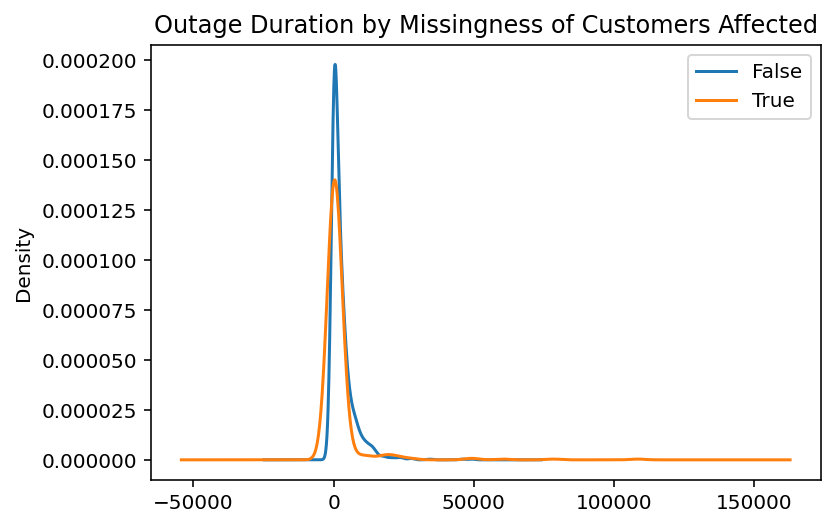

In [49]:
# plot the observed distribution
(clean_data.assign(is_null = clean_data["CUSTOMERS.AFFECTED"].isnull())
 .groupby('is_null')["OUTAGE.DURATION"].plot(kind = 'kde', legend = True, title = 'Outage Duration by Missingness of Customers Affected')
)

In [50]:
# compute the observed ks statistic
copy_clean = clean_data.copy(deep = True)
copy_clean = copy_clean.assign(is_null = copy_clean["CUSTOMERS.AFFECTED"].isnull())
gpA = copy_clean.loc[copy_clean["is_null"] == True, "OUTAGE.DURATION"]
gpB = copy_clean.loc[copy_clean["is_null"] == False, "OUTAGE.DURATION"]

obs = ks_2samp(gpA, gpB).statistic
obs


0.31113998588906155

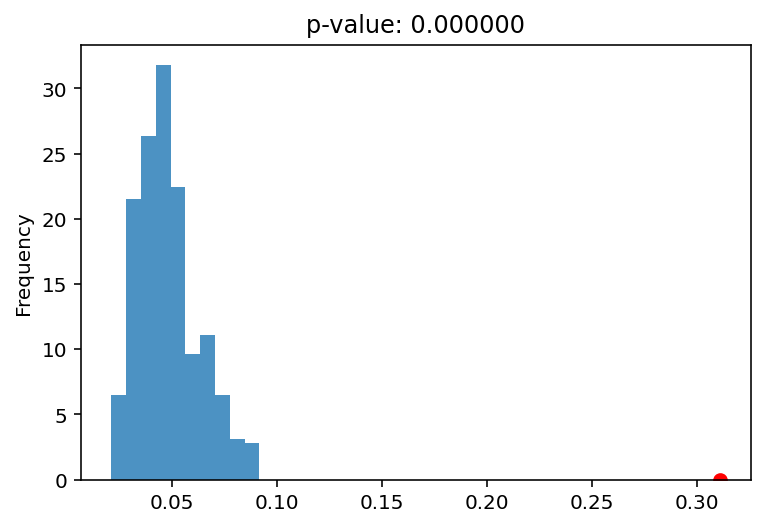

In [51]:
# simulate the null hypothesis
n_repetitions = 500

ks_list = []

for _ in range(n_repetitions):
    
    shuffled_col = (
    copy_clean["OUTAGE.DURATION"]
    .sample(replace = False, frac = 1)
    .reset_index(drop = True)
    )
    
    shuffled = (
    copy_clean
    .assign(**{
        "OUTAGE.DURATION" : shuffled_col,
    })
    )
    
    grps = shuffled.groupby("is_null")["OUTAGE.DURATION"]
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    
    ks_list.append(ks)

# compute the pval
pval = np.mean(np.array(ks_list) > obs)


pd.Series(ks_list).plot(kind = 'hist', density = True, alpha = 0.8, title = 'p-value: %f' % pval)
plt.scatter(obs, 0, color = 'red', s = 40)

#### Is CUSTOMERS.AFFECTED MAR Dependent on DEMAND.LOSS.MW?

In [52]:
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)

is_null
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DEMAND.LOSS.MW, dtype: object

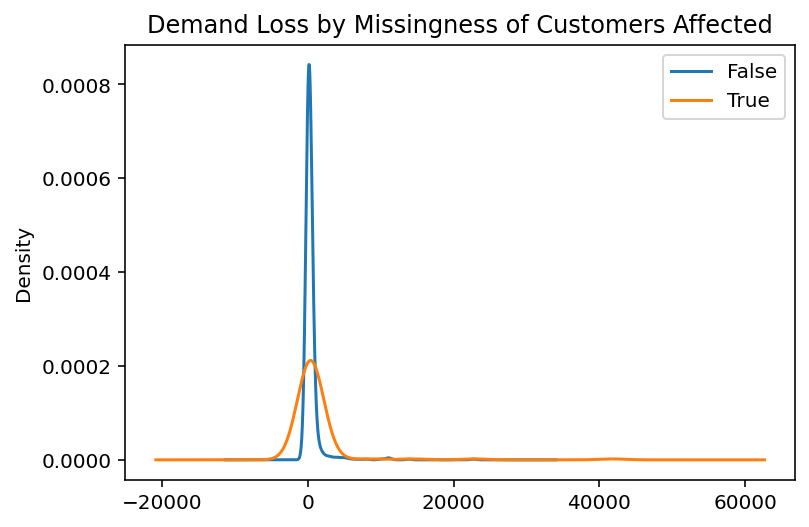

In [53]:
# plot the observed distribution
(clean_data.assign(is_null = clean_data["CUSTOMERS.AFFECTED"].isnull())
 .groupby('is_null')["DEMAND.LOSS.MW"].plot(kind = 'kde', legend = True, title = 'Demand Loss by Missingness of Customers Affected')
)

In [54]:
# compute the observed statistic
copy_clean = clean_data.copy(deep = True)
copy_clean = copy_clean.assign(is_null = copy_clean["CUSTOMERS.AFFECTED"].isnull())
gpA = copy_clean.loc[copy_clean["is_null"] == True, "DEMAND.LOSS.MW"]
gpB = copy_clean.loc[copy_clean["is_null"] == False, "DEMAND.LOSS.MW"]

obs = ks_2samp(gpA, gpB).statistic
obs

0.3975332755377985

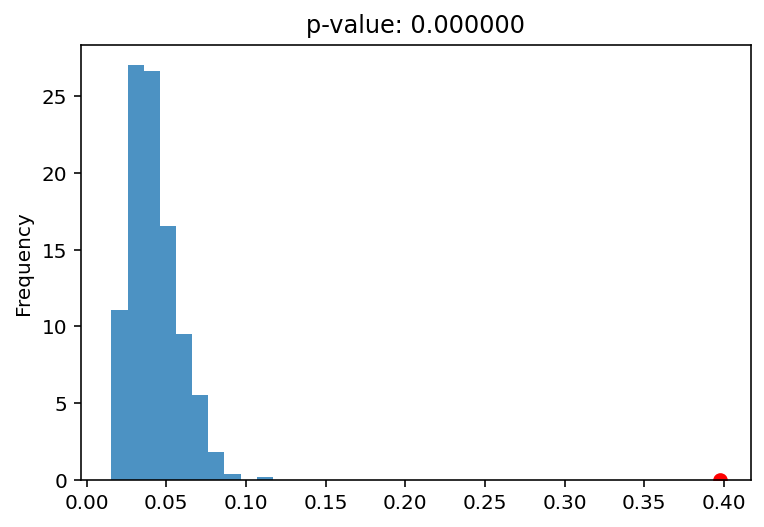

In [55]:
# simulate the null hypothesis
n_repetitions = 500

ks_list = []

for _ in range(n_repetitions):
    
    shuffled_col = (
    copy_clean["DEMAND.LOSS.MW"]
    .sample(replace = False, frac = 1)
    .reset_index(drop = True)
    )
    
    shuffled = (
    copy_clean
    .assign(**{
        "DEMAND.LOSS.MW" : shuffled_col,
    })
    )
    
    grps = shuffled.groupby("is_null")["DEMAND.LOSS.MW"]
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    
    ks_list.append(ks)
    
pval = np.mean(np.array(ks_list) > obs)


pd.Series(ks_list).plot(kind = 'hist', density = True, alpha = 0.8, title = 'p-value: %f' % pval)
plt.scatter(obs, 0, color = 'red', s = 40)

#### Is CUSTOMERS.AFFECTED MAR Dependent on ANOMALY LEVEL?

In [56]:
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)

is_null
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: ANOMALY.LEVEL, dtype: object

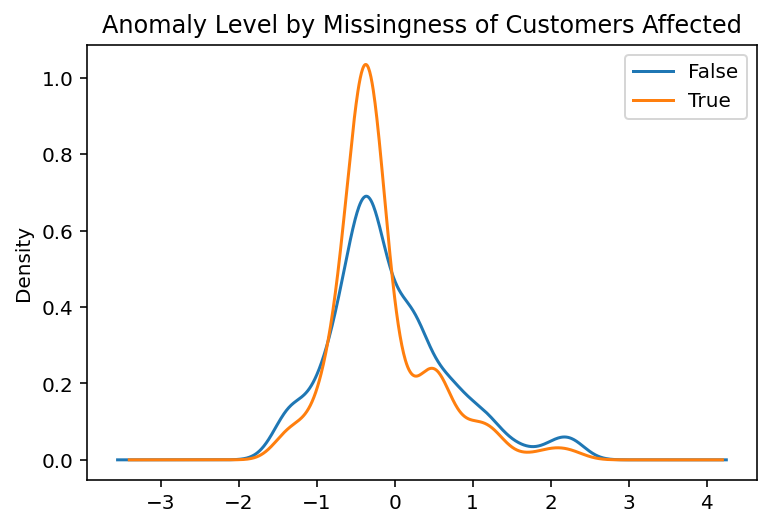

In [57]:
# plot the observed distribution
(clean_data.assign(is_null = clean_data["CUSTOMERS.AFFECTED"].isnull())
 .groupby('is_null')["ANOMALY.LEVEL"].plot(kind = 'kde', legend = True, title = 'Anomaly Level by Missingness of Customers Affected')
)

In [58]:
# compute the observed statistic
copy_clean = clean_data.copy(deep = True)
copy_clean = copy_clean.assign(is_null = copy_clean["CUSTOMERS.AFFECTED"].isnull())
gpA = copy_clean.loc[copy_clean["is_null"] == True, "ANOMALY.LEVEL"]
gpB = copy_clean.loc[copy_clean["is_null"] == False, "ANOMALY.LEVEL"]

obs = ks_2samp(gpA, gpB).statistic
obs

0.06012046024005148

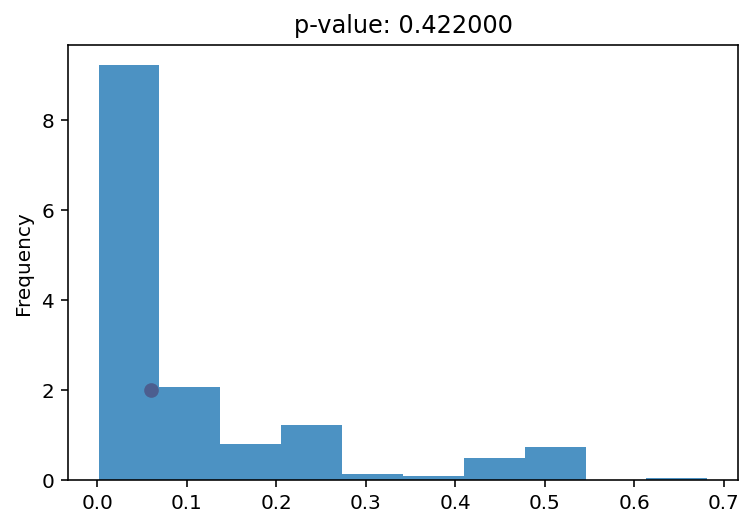

In [59]:
# simulate the null hypothesis
n_repetitions = 500

ks_list = []

for _ in range(n_repetitions):
    
    shuffled_col = (
    copy_clean["ANOMALY.LEVEL"]
    .sample(replace = False, frac = 1)
    .reset_index(drop = True)
    )
    
    shuffled = (
    copy_clean
    .assign(**{
        "ANOMALY.LEVEL" : shuffled_col,
    })
    )
    
    grps = shuffled.groupby("is_null")["ANOMALY.LEVEL"]
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    
    ks_list.append(ks)
    
pval = np.mean(np.array(ks_list) > obs)


pd.Series(ks_list).plot(kind = 'hist', density = True, alpha = 0.8, title = 'p-value: %f' % pval)
plt.scatter(obs, 2, color = 'red', s = 40)

### Hypothesis Test

### Question: (just a reminder)

Is the distribution of climate category different for those outages that were classified as 'major' than those that were not classified as 'major'?

In [60]:
# conditional function to determine if a power outage is classified as 'major'
def detect_major(row):
    if row["CUSTOMERS.AFFECTED"] > 50000:
        return True
    elif row["DEMAND.LOSS.MW"] > 300:
        return True
    else:
        return False

In [61]:
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)

In [62]:
# compute the distribution of outages in a certain climate conditional on whether it was a major pwer outage or not
clean_data["Major_Outage"] = clean_data.apply(detect_major, axis = 1)
climate_counts = clean_data.pivot_table(index = "CLIMATE.CATEGORY", columns = "Major_Outage", aggfunc = 'size')
climate_counts

Major_Outage,False,True
CLIMATE.CATEGORY,,
cold,236,237
normal,367,377
warm,140,168


In [63]:
climate_counts.sum().to_frame().T
cond_distr = climate_counts / climate_counts.sum()
cond_distr

Major_Outage,False,True
CLIMATE.CATEGORY,,
cold,0.317631,0.303069
normal,0.493943,0.482097
warm,0.188425,0.214834


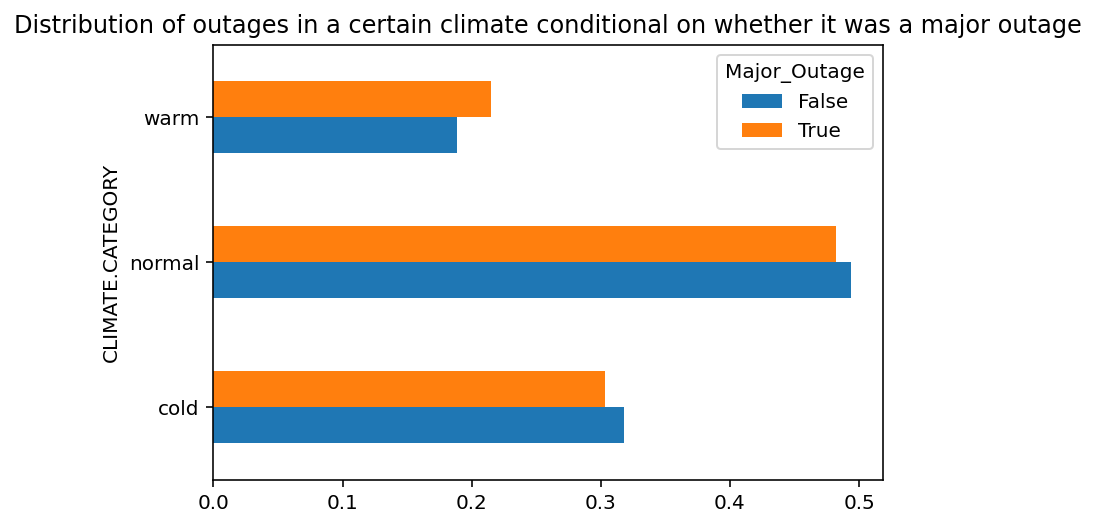

In [64]:
# plot the observed distribution
title = "Distribution of outages in a certain climate conditional on whether it was a major outage"
cond_distr.plot(kind = 'barh', title = title)

In [65]:
# find the observed TVD
obs = cond_distr.diff(axis =1).iloc[-1].abs().sum() / 2
obs

0.013204228382206654

In [66]:
# helper function to compute the TVD
def compute_tvd(df):
    
    counts = df.pivot_table(index = "CLIMATE.CATEGORY", columns = "Major_Outage", aggfunc = 'size')
    distr = counts / counts.sum()
    
    return distr.diff(axis = 1).iloc[-1].abs().sum() / 2

In [67]:
# ensure that the helper function works
observed = compute_tvd(clean_data)
observed

0.013204228382206654

In [68]:
# simulate null
N = 1000

tvds = []

for _ in range(N):
    
    s = clean_data["Major_Outage"].sample(frac = 1, replace = False).reset_index(drop = True)
    shuffled = clean_data.loc[:, ["CLIMATE.CATEGORY"]].assign(Major_Outage = s)
    
    tvds.append(compute_tvd(shuffled))

tvds = pd.Series(tvds)

In [69]:
# compute the pval
pval = (tvds >= obs).sum() / N
pval

0.214

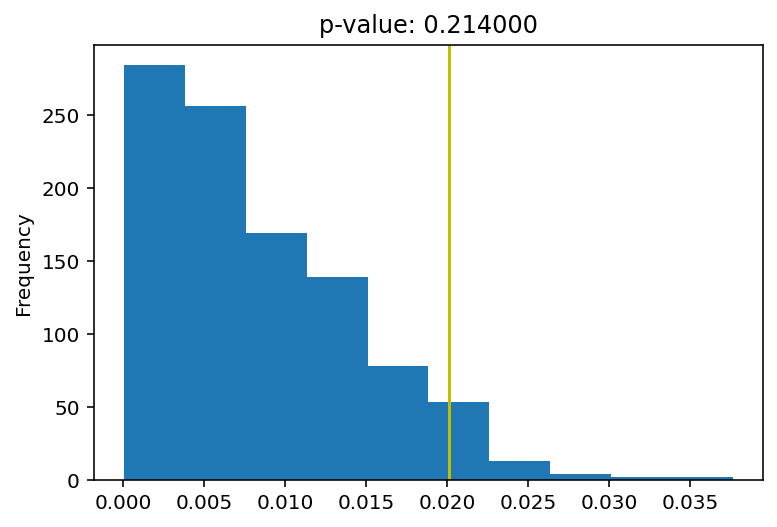

In [70]:
# plot the simulated tvds with the observed
tvds.plot(kind = 'hist', title = 'p-value: %f' % pval)

perc = np.percentile(tvds, 95)
plt.axvline(x = perc, color = 'y')

# Classification

In [73]:
# now let us read in the clean data
fp = os.path.join('data', 'outage.xlsx')
data = read_data(fp)
clean_data = data_cleaning(data)
# conditional function to determine if a power 
# outage is classified as 'major'
def detect_major(row):
    if row["CUSTOMERS.AFFECTED"] > 50000:
        return 1
    elif row["DEMAND.LOSS.MW"] > 300:
        return 1
    else:
        return 0

In [74]:
# classify each power outage observation as a 
# 0 or 1 in the major outage column
clean_data["Major_Outage"] = clean_data.apply(detect_major, axis = 1)
clean_data.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,OUTAGE.START,OUTAGE.RESTORATION,SEASON,Major_Outage
0,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,NaN,3060.0,NaN,70000.0,2011-07-01 17:00:00,2011-07-03 20:00:00,Summer,1
1,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,NaN,1.0,NaN,NaN,2014-05-11 18:38:00,2014-05-11 18:39:00,Spring,0
2,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,NaN,3000.0,NaN,70000.0,2010-10-26 20:00:00,2010-10-28 22:00:00,Fall,1
3,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,NaN,2550.0,NaN,68200.0,2012-06-19 04:30:00,2012-06-20 23:00:00,Summer,1
4,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,NaN,1740.0,250.0,250000.0,2015-07-18 02:00:00,2015-07-19 07:00:00,Summer,1


In [75]:
# 785/1534 (0.51) power outages were classified as being "Major"
print(clean_data["Major_Outage"].sum())
print(len(clean_data["Major_Outage"]))

785
1534


In [76]:
# here we computed the accuracy score for baseline model by
# making a pipeline that first one hot encodes the necessary vars
# and then predicts using a decision tree classifier

def baseline_accuracy(data):

    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    X = features[preds]
    y = features["major_outage"]
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    ct = ColumnTransformer(transformers = [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot)]
                           , remainder = 'passthrough')
    pl = Pipeline(steps = [('pp', ct), 
                           ('tree', DecisionTreeClassifier(max_depth = 8))])
    
    pl.fit(X, y)
    preds = pl.predict(X)
    
    return pl.score(X, y)
baseline_accuracy(clean_data)

/Users/andrewli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-76-5241504153c1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


0.8599592114208022

# Final Model


### Adding in the Engineered Features

In [77]:
# logic behind binarizing cause category
print("# major power outages with cause severe:", 
      clean_data[clean_data["CAUSE.CATEGORY"] == "severe weather"]["Major_Outage"].sum())
print("# outages with cause severe:",
    len(clean_data[clean_data["CAUSE.CATEGORY"] == "severe weather"]["Major_Outage"]))

print("# major power outages with other cause:",
    clean_data[clean_data["CAUSE.CATEGORY"] != "severe weather"]["Major_Outage"].sum())
print("# outages with other cause",
    len(clean_data[clean_data["CAUSE.CATEGORY"] != "severe weather"]["Major_Outage"]))

# major power outages with cause severe: 662
# outages with cause severe: 763
# major power outages with other cause: 123
# outages with other cause 771


In [78]:
# a function that transfroms our engineered features
# and computes the accuracy score of the model on the whole dataset
# have not changed any parameters yet

def add_features_accuracy(data):

    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    def season_helper(df):
        """
        Helper functions converts month into 
        respective season.
        """
        def helper(obs):
            if obs >= 3 and obs <= 5:
                return 'Spring'
            elif obs >= 6 and obs <= 8:
                return 'Summer'
            elif obs >= 9 and obs <= 11:
                return 'Fall'
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 'Winter'
        
        df["month"] = df["month"].apply(helper)
        return df
    
    def cause_helper(df):
        """
        Helper functions converts cause
        into binary variable.
        """
        def helper2(obs):
            if obs == 'severe weather':
                return 1
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 0
            
        df["cause.category"] = df["cause.category"].apply(helper2)
        return df
    
    X = features[preds]
    y = features["major_outage"]
    
    season_scale = ("convert season", Pipeline([
        ("pass to helper", FunctionTransformer(season_helper)),
        ("one_hot", OneHotEncoder(handle_unknown = 'ignore'))]), ["month"])
    
    cause_scale = (
        "scale cause", FunctionTransformer(cause_helper), 
        ["cause.category"])
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    ct = ColumnTransformer(
        transformers = [
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot),
                                          season_scale, cause_scale], 
        remainder = 'passthrough')
    pl = Pipeline(
        steps = [('pp', ct), ('tree', DecisionTreeClassifier(max_depth = 8))])
    
    pl.fit(X, y)
    preds = pl.predict(X)
    
    return pl.score(X, y)
add_features_accuracy(clean_data)

/Users/andrewli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-78-0421aefc2832>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


0.9259007477906186

### Testing Using Train/Test Split

In [79]:
# same thing as above adding train test split to see how our model generalizes
def trntst_split_accuracy(data, max_depth, min_leaf, min_split):

    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    def season_helper(df):
        """
        Helper functions converts month into 
        respective season.
        """
        def helper(obs):
            if obs >= 3 and obs <= 5:
                return 'Spring'
            elif obs >= 6 and obs <= 8:
                return 'Summer'
            elif obs >= 9 and obs <= 11:
                return 'Fall'
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 'Winter'
        
        df["month"] = df["month"].apply(helper)
        return df
    
    def cause_helper(df):
        """
        Helper functions converts cause
        into binary variable.
        """
        def helper2(obs):
            if obs == 'severe weather':
                return 1
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 0
            
        df["cause.category"] = df["cause.category"].apply(helper2)
        return df
    
    X = features[preds]
    y = features["major_outage"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    season_scale = ("convert season", 
                    Pipeline([
        ("pass to helper", FunctionTransformer(season_helper)),
        ("one_hot", OneHotEncoder(handle_unknown = 'ignore'))]), 
                    ["month"])
    
    cause_scale = (
        "scale cause", FunctionTransformer(cause_helper), 
        ["cause.category"])
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    ct = ColumnTransformer(transformers = [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot),
                                          season_scale, cause_scale], 
                           remainder = 'passthrough')
    pl = Pipeline(
        steps = [('pp', ct), ('tree', DecisionTreeClassifier(
            max_depth = max_depth, min_samples_leaf = min_leaf,
            min_samples_split = min_split))])
    
    pl.fit(X_train, y_train)
    
    return pl.score(X_train, y_train), pl.score(X_test, y_test)
trntst_split_accuracy(clean_data, 4, 2, 2)

/Users/andrewli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-79-7c9e183a07df>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


(0.8756073858114675, 0.8393665158371041)

### Search for the Best Decision Classifier Parameters with Gridsearch

/Users/andrewli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-80-8b3e0e883f15>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}

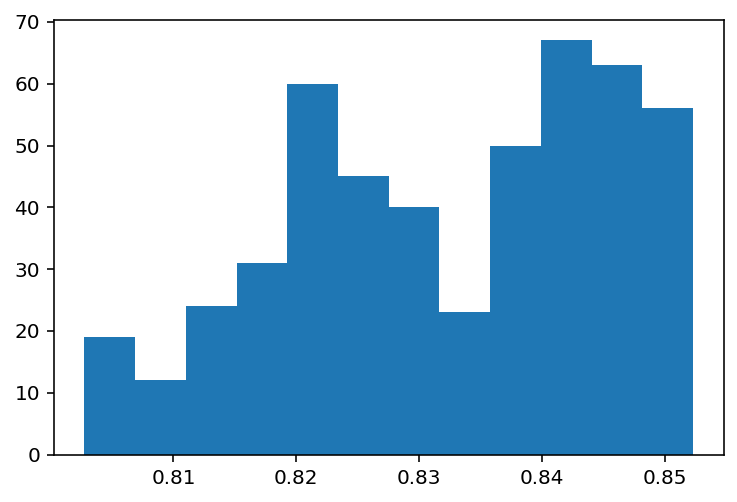

In [80]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
# a function to do a grid search for the best model parameters
def gridsearch_cv(data):
    
    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    def season_helper(df):
        """
        Helper functions converts month into 
        respective season.
        """
        def helper(obs):
            if obs >= 3 and obs <= 5:
                return 'Spring'
            elif obs >= 6 and obs <= 8:
                return 'Summer'
            elif obs >= 9 and obs <= 11:
                return 'Fall'
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 'Winter'
        
        df["month"] = df["month"].apply(helper)
        return df
    
    def cause_helper(df):
        """
        Helper functions converts cause
        into binary variable.
        """
        def helper2(obs):
            if obs == 'severe weather':
                return 1
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 0
            
        df["cause.category"] = df["cause.category"].apply(helper2)
        return df
    
    X = features[preds]
    y = features["major_outage"]
    
    season_scale = ("convert season", Pipeline([
        ("pass to helper", FunctionTransformer(season_helper)),
        ("one_hot", OneHotEncoder(handle_unknown = 'ignore'))]), ["month"])
    
    cause_scale = (
        "scale cause", FunctionTransformer(cause_helper), 
        ["cause.category"])
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    ct = ColumnTransformer(
        transformers = [('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot),
                                          season_scale, cause_scale], 
        remainder = 'passthrough')
    
    transformed_X = ct.fit(X).transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.3)

    parameters = {"max_depth": [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
             "min_samples_split": [2, 3, 5, 7, 10, 15, 20],
             "min_samples_leaf": [2, 3, 5, 7, 10, 15, 20]
             }
    clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 8)

    clf.fit(X_train, y_train)
    
    return clf.best_params_, plt.hist(clf.cv_results_["mean_test_score"], bins = 12)
# our grid search gives us different results each time
# but the best parameters all seem to be in the ballpark of 3, 7, 20
params, plot = gridsearch_cv(clean_data)
params

### Testing KNeighbors Model as an Alternative

In [82]:
# a function that computes the accuracy score
# using the kneighbors classifier with engineered features
from sklearn.neighbors import KNeighborsClassifier
def kneighbors_trtstsplit_accuracy(data, neighbors):
    
    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    def season_helper(df):
        """
        Helper functions converts month into 
        respective season.
        """
        def helper(obs):
            if obs >= 3 and obs <= 5:
                return 'Spring'
            elif obs >= 6 and obs <= 8:
                return 'Summer'
            elif obs >= 9 and obs <= 11:
                return 'Fall'
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 'Winter'
        
        df["month"] = df["month"].apply(helper)
        return df
    
    def cause_helper(df):
        """
        Helper functions converts cause
        into binary variable.
        """
        def helper2(obs):
            if obs == 'severe weather':
                return 1
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 0
            
        df["cause.category"] = df["cause.category"].apply(helper2)
        return df
    
    X = features[preds]
    y = features["major_outage"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    season_scale = ("convert season", Pipeline([
        ("pass to helper", FunctionTransformer(season_helper)),
        ("one_hot", OneHotEncoder(handle_unknown = 'ignore'))]), ["month"])
    
    cause_scale = (
        "scale cause", FunctionTransformer(cause_helper), ["cause.category"])
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    ct = ColumnTransformer(
        transformers = [('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot),
                                          season_scale, cause_scale], 
        remainder = 'passthrough')
    
    pl = Pipeline(
        steps = [('pp', ct), 
                 ('kneighbors', KNeighborsClassifier(n_neighbors = neighbors))])
    
    pl.fit(X_train, y_train)
    
    return pl.score(X_train, y_train), pl.score(X_test, y_test)
kneighbors_trtstsplit_accuracy(clean_data, 7)

<ipython-input-82-5c779b0d0265>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


(0.7920310981535471, 0.7262443438914027)

/Users/andrewli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-83-8def42ca2565>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


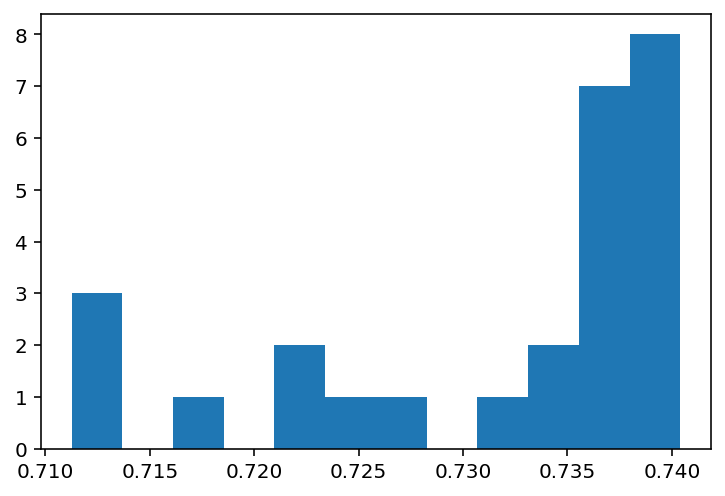

In [83]:
# grid search with kneighbors to find the best number of neighbors
def gridsearch_cv_kneighbors(data):
    
    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    def season_helper(df):
        """
        Helper functions converts month into 
        respective season.
        """
        def helper(obs):
            if obs >= 3 and obs <= 5:
                return 'Spring'
            elif obs >= 6 and obs <= 8:
                return 'Summer'
            elif obs >= 9 and obs <= 11:
                return 'Fall'
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 'Winter'
        
        df["month"] = df["month"].apply(helper)
        return df
    
    def cause_helper(df):
        """
        Helper functions converts cause
        into binary variable.
        """
        def helper2(obs):
            if obs == 'severe weather':
                return 1
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 0
            
        df["cause.category"] = df["cause.category"].apply(helper2)
        return df
    
    X = features[preds]
    y = features["major_outage"]
    
    season_scale = ("convert season", Pipeline([
        ("pass to helper", FunctionTransformer(season_helper)),
        ("one_hot", OneHotEncoder(handle_unknown = 'ignore'))]), ["month"])
    
    cause_scale = (
        "scale cause", FunctionTransformer(cause_helper), 
        ["cause.category"])
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    ct = ColumnTransformer(
        transformers = [('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot),
                                          season_scale, cause_scale], 
        remainder = 'passthrough')
    
    transformed_X = ct.fit(X).transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        transformed_X, y, test_size = 0.3)

    parameters = {"n_neighbors": [10, 12, 14, 16, 18, 20, 22, 24, 
                                  26, 28, 30,32, 34, 36, 38, 40, 42, 
                                  44, 46, 48, 50, 52, 54, 56, 58, 60]}
    clf = GridSearchCV(KNeighborsClassifier(), parameters, cv = 8)

    clf.fit(X_train, y_train)
    
    return clf.best_params_, plt.hist(clf.cv_results_["mean_test_score"], bins = 12)
params, plot = gridsearch_cv_kneighbors(clean_data)

In [84]:
kneighbors_trtstsplit_accuracy(clean_data, params["n_neighbors"])

/Users/andrewli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-82-5c779b0d0265>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)


(0.7434402332361516, 0.7239819004524887)

### Final Model:


In [86]:
# a function that returns our final pipeline
# with the engineered features
# and a decision tree classifier with our best found parameters

def final_pipeline(data):

    data_copy = data.copy(deep = True)
    
    feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
    preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
    data_copy.columns = data_copy.columns.str.lower()
    
    features = data_copy[feature_cols]
    features.drop(
        features[features['anomaly.level'].isna() == True].index, 
        inplace = True)
    features.drop(
        features[features['climate.region'].isna() == True].index, 
        inplace = True)
    features.dropna(inplace = True)
    
    def season_helper(df):
        """
        Helper functions converts month into 
        respective season.
        """
        def helper(obs):
            if obs >= 3 and obs <= 5:
                return 'Spring'
            elif obs >= 6 and obs <= 8:
                return 'Summer'
            elif obs >= 9 and obs <= 11:
                return 'Fall'
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 'Winter'
        
        df["month"] = df["month"].apply(helper)
        return df
    
    def cause_helper(df):
        """
        Helper functions converts cause
        into binary variable.
        """
        def helper2(obs):
            if obs == 'severe weather':
                return 1
            elif pd.isnull(obs):
                return np.NaN
            else:
                return 0
            
        df["cause.category"] = df["cause.category"].apply(helper2)
        return df
    
    X = features[preds]
    y = features["major_outage"]
    
    season_scale = ("convert season", Pipeline([
        ("pass to helper", FunctionTransformer(season_helper)),
        ("one_hot", OneHotEncoder(handle_unknown = 'ignore'))]), ["month"])
    
    cause_scale = (
        "scale cause", FunctionTransformer(cause_helper), 
        ["cause.category"])
    
    one_hot = ['u.s._state', 'climate.region', 'climate.category']
    
    ct = ColumnTransformer(
        transformers = [
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'), one_hot),
                                          season_scale, cause_scale], 
        remainder = 'passthrough')
    
    pl = Pipeline(
        steps = [('pp', ct), ('tree', DecisionTreeClassifier(max_depth = 3,
                                                min_samples_leaf = 7,
                                                min_samples_split = 20))])
    pl.fit(X, y)
    
    return pl

# Fairness Evaluation

In [87]:
from sklearn import metrics
# we manually transformed the necessary variables so the result 
# of our transformation was a dataframe
data_copy = clean_data.copy(deep = True)

feature_cols = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'major_outage', 'month', 'cause.category']
    
preds = ['u.s._state', 'year', 'climate.region',
               'anomaly.level', 'climate.category', 
               'outage.duration', 'month', 'cause.category']
    
data_copy.columns = data_copy.columns.str.lower()
    
features = data_copy[feature_cols]
features.dropna(inplace = True)
    
def season_helper(obs):
    if obs >= 3 and obs <= 5:
        return 'Spring'
    elif obs >= 6 and obs <= 8:
        return 'Summer'
    elif obs >= 9 and obs <= 11:
        return 'Fall'
    elif pd.isnull(obs):                
         return np.NaN
    else:
        return 'Winter'
    
def cause_helper(obs):
    if obs == 'severe weather':
        return 1
    elif pd.isnull(obs):
        return np.NaN
    else:
        return 0
                
X = features[preds]
y = features["major_outage"]
features['season'] = features['month'].apply(season_helper)
features['cause.category'] = features['cause.category'].apply(cause_helper)
# one hot season, state, climate.region, climate.category, 
seasons = features.season.unique()
onehotseason = features['season'].apply(
    lambda x: pd.Series(x == seasons, index=seasons, dtype=float))
states = features['u.s._state'].unique()
regions = features['climate.region'].unique()
cats = features['climate.category'].unique()
onehotstate = features['u.s._state'].apply(
    lambda x: pd.Series(x == states, index=states, dtype=float))
onehotreg = features['climate.region'].apply(
    lambda x: pd.Series(x == regions, index=regions, dtype=float))
onehotcats = features['climate.category'].apply(
    lambda x: pd.Series(x == cats, index=cats, dtype=float))
new_features = pd.concat(
    [onehotseason,onehotstate,onehotreg,onehotcats,features], axis = 1)
new_features.drop(
    columns = ['climate.category', 'season', 'climate.region', 'u.s._state'], 
    inplace = True)


<ipython-input-87-f0755e4d717c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace = True)
<ipython-input-87-f0755e4d717c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['season'] = features['month'].apply(season_helper)
<ipython-input-87-f0755e4d717c>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [88]:
new_features.drop(
    columns = ['major_outage'], inplace = True)
new_features['anomaly.level'] = new_features['anomaly.level'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(
    new_features, y, test_size = 0.3)
# permutation test
clf = DecisionTreeClassifier(
    max_depth = 3, min_samples_split = 20, min_samples_leaf = 7)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
results = X_test.copy() 
results['preds'] = preds
results['tag'] = y_test
mean = new_features["outage.duration"].mean()
results['is_long'] = (
    results['outage.duration'] <= mean).replace(
    {True: 'short', False : 'long'})

obs = results.groupby('is_long').apply(
    lambda x: metrics.accuracy_score(x.tag, x.preds)).diff().iloc[-1]
metrs = []
for _ in range(100):
    s = (
        results[['is_long', 'preds', 'tag']]
        .assign(is_long=results.is_long.sample(
            frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_long')
        .apply(lambda x: metrics.accuracy_score(x.tag, x.preds))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)
print(pd.Series(metrs <= obs).mean())

0.26


# The End :)